# In class Assignment #4
###### Jenn Ranta
###### PHY905

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import rcParams
from math import *
%matplotlib inline

In [2]:
# This function is a particular function 
# for force used in this assignment
def force(k, x):
    return -k*x

# This function implements Euler's method of 
# integration for a force equation in the form 
# of Hooke's Law. The inputs needed are: 
# f = force function
# m = mass of object
# k = spring constant
# dt = time step
# t0, tf = initial & final times
# x0, v0 = position & velocity initial conditions
def euler(f, m, k, x0, v0, t0, tf, dt):

    # Declare & initialize time, position, & velocity arrays
    t = np.arange(t0, tf, dt)
    x = np.zeros(np.size(t))
    v = np.zeros(np.size(t))
    x[0] = x0
    v[0] = v0

    for i in range(0,np.size(t)-1):
        v[i+1] = v[i] + dt*f(k, x[i])/m
        x[i+1] = x[i] + v[i]*dt

    # Return the position, velocity, & time arrays
    return x, v, t

# This function implements the midpoint method of 
# integration for a force equation in the form 
# of Hooke's Law. The inputs needed are: 
# f = force function
# m = mass of object
# k = spring constant
# dt = time step
# t0, tf = initial & final times
# x0, v0 = position & velocity initial conditions
def midpoint(f, m, k, x0, v0, t0, tf, dt):
    
    # Declare & initialize time, position, & velocity arrays
    t = np.arange(t0, tf, dt)
    x = np.zeros(np.size(t))
    v = np.zeros(np.size(t))
    x[0] = x0
    v[0] = v0

    for i in range(0,np.size(t)-1):
        x_mid = x[i] + (dt*0.5)*v[i]
        v_mid = v[i] + (dt*0.5)*f(k, x[i])
        a_mid = f(k, x_mid)/m
        
           
        x[i+1] = x[i] + dt*v_mid
        v[i+1] = v[i] + dt*a_mid
    
    # Return the position, velocity, & time arrays
    return x, v, t

# This function implements the Runge-Kutta method of 
# integration for a force equation in the form 
# of Hooke's Law. The inputs needed are: 
# f = force function
# m = mass of object
# k = spring constant
# dt = time step
# t0, tf = initial & final times
# x0, v0 = position & velocity initial conditions
def runge_kutta(f, m, k, x0, v0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    x = np.zeros(np.size(t))
    v = np.zeros(np.size(t))
    x[0] = x0
    v[0] = v0

    for i in range(0,np.size(t)-1):
        x1 = x[i]
        v1 = v[i]
        a1 = f(k, x1)/m
        
        x2 = x[i] + (dt*0.5)*v1
        v2 = v[i] + (dt*0.5)*a1
        a2 = f(k, x2)/m
        
        x3 = x[i] + (dt*0.5)*v2
        v3 = v[i] + (dt*0.5)*a2
        a3 = f(k, x3)/m
        
        x4 = x[i] + dt*v3
        v4 = v[i] + dt*a3
        a4 = f(k, x4)/m
           
        x[i+1] = x[i] + (dt/6.)*(v1 + 2.*v2 + 2.*v3 + v4)
        v[i+1] = v[i] + (dt/6.)*(a1 + 2.*a2 + 2.*a3 + a4)
    
    # Return the position, velocity, & time arrays
    return x, v, t

# This function returns the analytic values for 
# specific position and velocity functions
def analytic(m, k, xm, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    x = np.zeros(np.size(t))
    v = np.zeros(np.size(t))
    omega = (k/m)**0.5

    for i in range(0,np.size(t)):
        x[i] = xm*np.sin(omega*t[i])
        v[i] = xm*omega*np.cos(omega*t[i])
    
    # Return the position, velocity, & time arrays
    return x, v, t


# This function merely returns the value of the 
# energy at a given position x and velocity v, 
# for system of mass m and spring constant k
def energy(k, m, x, v):
    return (1./2.)*(k*x**2. + m*v**2.)

def rel_err(original, new):
    return np.abs(new - original)/original

In [3]:
# Initialize variables
m = 1
k = 1
x0 = 0
v0 = 1
t0 = 0
tf = 4.*np.pi

xm = 1

dt = ([0.1*np.pi, 0.01*np.pi, 0.001*np.pi])

In [4]:
# Create position, velocity, and time arrays for the analytic solution
x_analytic, v_analytic, t_analytic = analytic(m, k, xm, t0, tf, 0.0001)

In [5]:
# Create position, velocity, and time arrays for the Euler solution
# with varying time step sizes
x_eul_1,v_eul_1,t_eul_1 = euler(force, m, k, x0, v0, t0, tf, dt[0])
x_eul_2,v_eul_2,t_eul_2 = euler(force, m, k, x0, v0, t0, tf, dt[1])
x_eul_3,v_eul_3,t_eul_3 = euler(force, m, k, x0, v0, t0, tf, dt[2])

In [6]:
# Create position, velocity, and time arrays for the midpoint solution
# with varying time step sizes
x_mid_1,v_mid_1,t_mid_1 = midpoint(force, m, k, x0, v0, t0, tf, dt[0])
x_mid_2,v_mid_2,t_mid_2 = midpoint(force, m, k, x0, v0, t0, tf, dt[1])
x_mid_3,v_mid_3,t_mid_3 = midpoint(force, m, k, x0, v0, t0, tf, dt[2])

In [7]:
# Create position, velocity, and time arrays for the RK4 solution
# with varying time step sizes
x_rk4_1,v_rk4_1,t_rk4_1 = runge_kutta(force, m, k, x0, v0, t0, tf, dt[0])
x_rk4_2,v_rk4_2,t_rk4_2 = runge_kutta(force, m, k, x0, v0, t0, tf, dt[1])
x_rk4_3,v_rk4_3,t_rk4_3 = runge_kutta(force, m, k, x0, v0, t0, tf, dt[2])

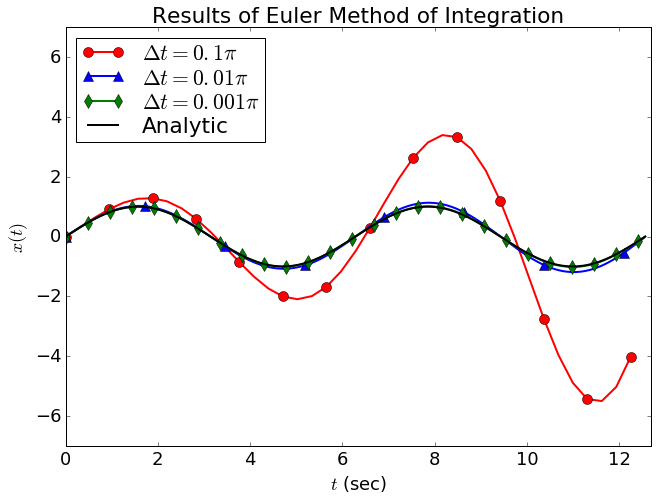

In [8]:
rcParams.update({'font.size': 18})
plt.plot(t_eul_1, x_eul_1, color='r', marker='o', ms=10, markevery=3, linewidth=2, label=r'$\Delta t = 0.1\pi$')
plt.plot(t_eul_2, x_eul_2, color='b', marker='^', ms=10, markevery=55, linewidth=2, label=r'$\Delta t = 0.01\pi$')
plt.plot(t_eul_3, x_eul_3, color='g', marker='d', ms=10, markevery=152, linewidth=2, label=r'$\Delta t = 0.001\pi$')
plt.plot(t_analytic, x_analytic, color='k', linewidth=2, label=r'Analytic')
plt.xlim(0,12.7)
plt.ylim(-7,7)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x(t)$')
plt.title(r'Results of Euler Method of Integration')
plt.gca().legend(loc='best', labelspacing=0.2, borderpad=0.25)
plt.gcf().set_size_inches(10.5,7.5)
plt.savefig("ica_04_eul_ranta.png", dpi=500)
plt.show()

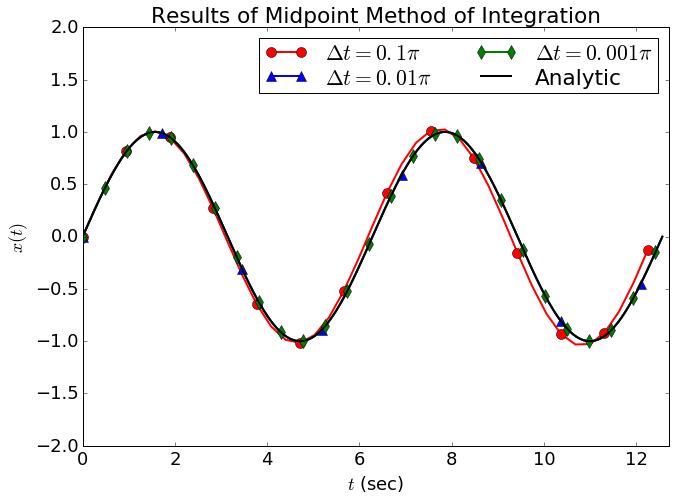

In [9]:
rcParams.update({'font.size': 18})
plt.plot(t_mid_1, x_mid_1, color='r', marker='o', ms=10, markevery=3, linewidth=2, label=r'$\Delta t = 0.1\pi$')
plt.plot(t_mid_2, x_mid_2, color='b', marker='^', ms=10, markevery=55, linewidth=2, label=r'$\Delta t = 0.01\pi$')
plt.plot(t_mid_3, x_mid_3, color='g', marker='d', ms=10, markevery=152, linewidth=2, label=r'$\Delta t = 0.001\pi$')
plt.plot(t_analytic, x_analytic, color='k', linewidth=2, label=r'Analytic')
plt.xlim(0,12.7)
plt.ylim(-2,2)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x(t)$')
plt.title(r'Results of Midpoint Method of Integration')
plt.gca().legend(loc='best', ncol=2, labelspacing=0.2, borderpad=0.25)
plt.gcf().set_size_inches(10.5,7.5)
plt.savefig("ica_04_mid_ranta.png", dpi=500)
plt.show()

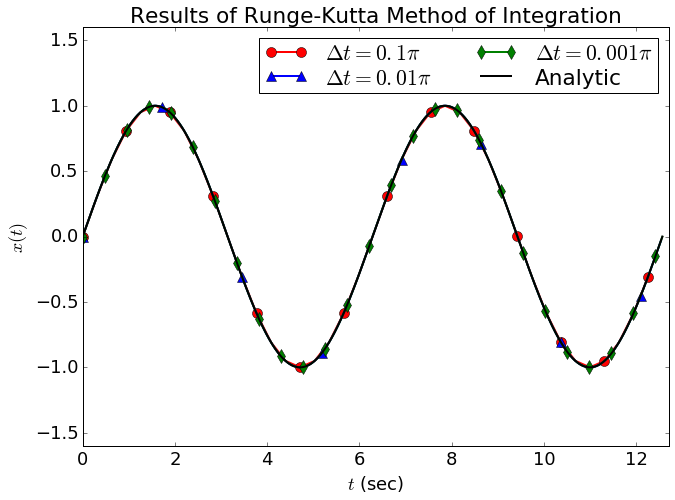

In [10]:
rcParams.update({'font.size': 18})
plt.plot(t_rk4_1, x_rk4_1, color='r', marker='o', ms=10, markevery=3, linewidth=2, label=r'$\Delta t = 0.1\pi$')
plt.plot(t_rk4_2, x_rk4_2, color='b', marker='^', ms=10, markevery=55, linewidth=2, label=r'$\Delta t = 0.01\pi$')
plt.plot(t_rk4_3, x_rk4_3, color='g', marker='d', ms=10, markevery=152, linewidth=2, label=r'$\Delta t = 0.001\pi$')
plt.plot(t_analytic, x_analytic, color='k', linewidth=2, label=r'Analytic')
plt.xlim(0,12.7)
plt.ylim(-1.6,1.6)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x(t)$')
plt.title(r'Results of Runge-Kutta Method of Integration')
plt.gca().legend(loc='best', ncol=2, labelspacing=0.2, borderpad=0.25)
plt.gcf().set_size_inches(10.5,7.5)
plt.savefig("ica_04_rk4_ranta.png", dpi=500)
plt.show()

In [11]:
# Find the energies as functions of time for the 
# various time steps for each method
energy_eul_1 = energy(k, m, x_eul_1, v_eul_1)
energy_eul_2 = energy(k, m, x_eul_2, v_eul_2)
energy_eul_3 = energy(k, m, x_eul_3, v_eul_3)

energy_mid_1 = energy(k, m, x_mid_1, v_mid_1)
energy_mid_2 = energy(k, m, x_mid_2, v_mid_2)
energy_mid_3 = energy(k, m, x_mid_3, v_mid_3)

energy_rk4_1 = energy(k, m, x_rk4_1, v_rk4_1)
energy_rk4_2 = energy(k, m, x_rk4_2, v_rk4_2)
energy_rk4_3 = energy(k, m, x_rk4_3, v_rk4_3)

delE_eul = ([rel_err(energy_eul_1[0], energy_eul_1[-1]), rel_err(energy_eul_2[0], energy_eul_2[-1]), rel_err(energy_eul_3[0], energy_eul_3[-1])])
delE_mid = ([rel_err(energy_mid_1[0], energy_mid_1[-1]), rel_err(energy_mid_2[0], energy_mid_2[-1]), rel_err(energy_mid_3[0], energy_mid_3[-1])])
delE_rk4 = ([rel_err(energy_rk4_1[0], energy_rk4_1[-1]), rel_err(energy_rk4_2[0], energy_rk4_2[-1]), rel_err(energy_rk4_3[0], energy_rk4_3[-1])])

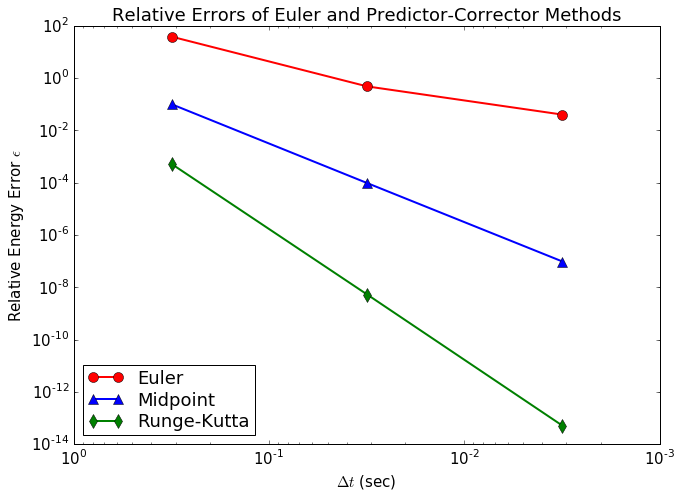

In [12]:
rcParams.update({'font.size': 15})
plt.plot(dt, delE_eul, color='r', marker='o', ms=10, linewidth=2, label=r'Euler')
plt.plot(dt, delE_mid, color='b', marker='^', ms=10, linewidth=2, label=r'Midpoint')
plt.plot(dt, delE_rk4, color='g', marker='d', ms=10, linewidth=2, label=r'Runge-Kutta')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\Delta t$ (sec)')
plt.ylabel(r'Relative Energy Error $\epsilon$')
plt.title(r'Relative Errors of Euler and Predictor-Corrector Methods')
plt.gca().legend(loc='best', ncol=1, labelspacing=0.2, borderpad=0.25)
plt.gcf().set_size_inches(10.5,7.5)
plt.savefig("ica_04_error_ranta.png", dpi=500)
plt.show()

-----------------------------------------------------------------------------

In [13]:
dt2 = ([0.1*np.pi, 0.01*np.pi, 0.001*np.pi, 0.0001*np.pi, 0.00001*np.pi, 0.000001*np.pi])

In [14]:
# For finding time steps for relative error > 0.01%
# for the Euler method: make functions for smaller dt's
x_eul_4,v_eul_4,t_eul_4 = euler(force, m, k, x0, v0, t0, tf, dt2[3])
x_eul_5,v_eul_5,t_eul_5 = euler(force, m, k, x0, v0, t0, tf, dt2[4])
x_eul_6,v_eul_6,t_eul_6 = euler(force, m, k, x0, v0, t0, tf, dt2[5])

In [15]:
# For finding time steps for relative error > 0.01%
# for the Midpoint method: make functions for smaller dt's
x_mid_4,v_mid_4,t_mid_4 = midpoint(force, m, k, x0, v0, t0, tf, dt2[3])
x_mid_5,v_mid_5,t_mid_5 = midpoint(force, m, k, x0, v0, t0, tf, dt2[4])
x_mid_6,v_mid_6,t_mid_6 = midpoint(force, m, k, x0, v0, t0, tf, dt2[5])

In [16]:
# For finding time steps for relative error > 0.01%
# for the Runge-Kutta method: make functions for smaller dt's
x_rk4_4,v_rk4_4,t_rk4_4 = runge_kutta(force, m, k, x0, v0, t0, tf, dt2[3])
x_rk4_5,v_rk4_5,t_rk4_5 = runge_kutta(force, m, k, x0, v0, t0, tf, dt2[4])
x_rk4_6,v_rk4_6,t_rk4_6 = runge_kutta(force, m, k, x0, v0, t0, tf, dt2[5])

In [17]:
# For finding time steps for relative error > 0.01%
# make the energy functions with smaller dt's
energy_eul_4 = energy(k, m, x_eul_4, v_eul_4)
energy_eul_5 = energy(k, m, x_eul_5, v_eul_5)
energy_eul_6 = energy(k, m, x_eul_6, v_eul_6)

energy_mid_4 = energy(k, m, x_mid_4, v_mid_4)
energy_mid_5 = energy(k, m, x_mid_5, v_mid_5)
energy_mid_6 = energy(k, m, x_mid_6, v_mid_6)

energy_rk4_4 = energy(k, m, x_rk4_4, v_rk4_4)
energy_rk4_5 = energy(k, m, x_rk4_5, v_rk4_5)
energy_rk4_6 = energy(k, m, x_rk4_6, v_rk4_6)

delE_eul_2 = ([rel_err(energy_eul_1[0], energy_eul_1[-1]), rel_err(energy_eul_2[0], energy_eul_2[-1]), rel_err(energy_eul_3[0], energy_eul_3[-1]), rel_err(energy_eul_4[0], energy_eul_4[-1]), rel_err(energy_eul_5[0], energy_eul_5[-1]), rel_err(energy_eul_6[0], energy_eul_6[-1])])
delE_mid_2 = ([rel_err(energy_mid_1[0], energy_mid_1[-1]), rel_err(energy_mid_2[0], energy_mid_2[-1]), rel_err(energy_mid_3[0], energy_mid_3[-1]), rel_err(energy_mid_4[0], energy_mid_4[-1]), rel_err(energy_mid_5[0], energy_mid_5[-1]), rel_err(energy_mid_6[0], energy_mid_6[-1])])
delE_rk4_2 = ([rel_err(energy_rk4_1[0], energy_rk4_1[-1]), rel_err(energy_rk4_2[0], energy_rk4_2[-1]), rel_err(energy_rk4_3[0], energy_rk4_3[-1]), rel_err(energy_rk4_4[0], energy_rk4_4[-1]), rel_err(energy_rk4_5[0], energy_rk4_5[-1]), rel_err(energy_rk4_6[0], energy_rk4_6[-1])])

In [18]:
# Guess and check for dt that gives relative 
# errors of 0.01% over full time
dt_eul = 0.00000795735
dt_mid = 0.0317018
dt_rk4 = 0.225576

x_eul_test,v_eul_test,t_eul_test = euler(force, m, k, x0, v0, t0, tf, dt_eul)
x_mid_test,v_mid_test,t_mid_test = midpoint(force, m, k, x0, v0, t0, tf, dt_mid)
x_rk4_test,v_rk4_test,t_rk4_test = runge_kutta(force, m, k, x0, v0, t0, tf, dt_rk4)

energy_eul_test = energy(k, m, x_eul_test, v_eul_test)
energy_mid_test = energy(k, m, x_mid_test, v_mid_test)
energy_rk4_test = energy(k, m, x_rk4_test, v_rk4_test)

epsilon_eul = rel_err(energy_eul_test[0], energy_eul_test[-1])
epsilon_mid = rel_err(energy_mid_test[0], energy_mid_test[-1])
epsilon_rk4 = rel_err(energy_rk4_test[0], energy_rk4_test[-1])

print epsilon_eul
print epsilon_mid
print epsilon_rk4

9.99999758886e-05
9.9998282356e-05
9.99988576834e-05


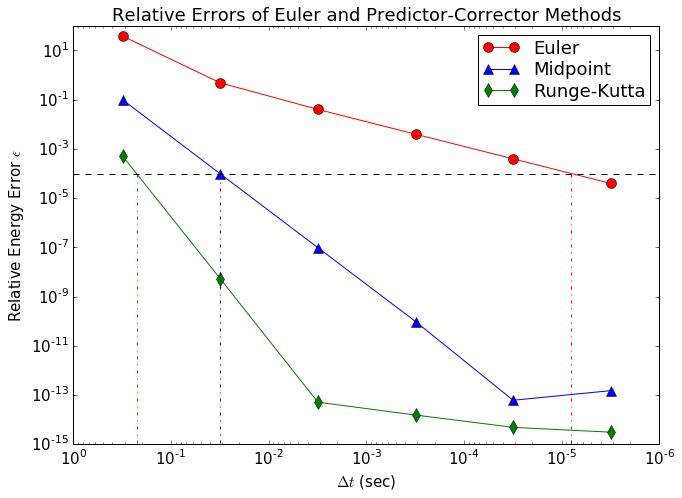

In [19]:
rcParams.update({'font.size': 15})
plt.plot(dt2, delE_eul_2, color='r', marker='o', ms=10, linewidth=1, label=r'Euler')
plt.plot(dt2, delE_mid_2, color='b', marker='^', ms=10, linewidth=1, label=r'Midpoint')
plt.plot(dt2, delE_rk4_2, color='g', marker='d', ms=10, linewidth=1, label=r'Runge-Kutta')
plt.gca().invert_xaxis()
plt.xlabel(r'$\Delta t$ (sec)')
plt.ylabel(r'Relative Energy Error $\epsilon$')
plt.title(r'Relative Errors of Euler and Predictor-Corrector Methods')
plt.axhline(y=0.0001, color='k', linestyle='--')
plt.plot((0.00000795735,0.00000795735), (0,1e-4), color='r', linestyle='-.')
plt.plot((0.0317018,0.0317018), (0,1e-4), color='b', linestyle='-.')
plt.plot((0.225576,0.225576), (0,1e-4), color='g', linestyle='-.')
#plt.axvline(x=0.00000795735, color='r', linestyle='--')
#plt.axvline(x=0.0317018, color='b', linestyle='--')
#plt.axvline(x=0.225576, color='g', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.gca().legend(loc='best', ncol=1, labelspacing=0.2, borderpad=0.25)
plt.gcf().set_size_inches(10.5,7.5)
plt.savefig("ica_04_error_ranta2.png", dpi=500)
plt.show()

In [20]:
# Calculate the total time steps for 
# each method using the time step size 
# that maintains an error above 0.01%
tSteps_eul = tf/dt_eul
tSteps_mid = tf/dt_mid
tSteps_rk4 = tf/dt_rk4

print tSteps_eul
print tSteps_mid
print tSteps_rk4

1579215.51953
396.392968676
55.7079237789


In [21]:
# Calculate floating-point operations 
# (only counting adds and multiplies, 
# not even stores/loads, nor divides)
# for each method
flops_eul = 4.*tSteps_eul
flops_mid = 10.*tSteps_mid
flops_rk4 = 32.*tSteps_rk4

print flops_eul
print flops_mid
print flops_rk4

6316862.07813
3963.92968676
1782.65356093
